In [1]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sellers = pd.read_csv('sellers+review+revenues.csv').sort_values('revenues', ascending = False).reset_index()
sellers['revxord'] = sellers['revenues']/sellers['count_sold']

In [2]:
# NUMBER OF ORDERS AND REVENUES PER SELLER IN SPAIN

fig = px.bar(sellers, x='seller_city',
             y='count_sold',
             height=1000,
             hover_name ='seller_id',
             color='revenues',
             labels=dict(revenues="Revenues"))

fig.update_layout(xaxis={'categoryorder':'total descending'},
                  title_text = 'Number of orders and revenues per seller in Spain',
                  title_x = 0.5,
                  plot_bgcolor='white')

fig.update_xaxes(title_text='Seller City')
fig.update_yaxes(title_text='n. Orders')
fig.show(renderer='browser')

In [3]:
# AVERAGE REVENUE PER SELLER IN SPAIN

fig2 = px.bar(sellers,
              x='seller_city',
              y='revxord',
              height=1000,
              hover_name ='seller_id',
              color = 'revenues',
              labels=dict(revenues="Revenues"))

fig2.update_layout(xaxis={'categoryorder':'total descending'},
                   title_text = 'Average revenue per seller in Spain',
                   title_x = 0.5,
                   plot_bgcolor='white')

fig2.update_xaxes(title_text='Seller City')
fig2.update_yaxes(title_text='Average Revenues')

fig2.show(renderer='browser')

In [4]:
# REVENUES AND AVERAGE REVENUES FOR THE FIRST N SELLERS FROM X CITY

filtercity = str(input('Provide a city to filter:'))
fsellers = sellers[sellers['seller_city'] == filtercity]
if len(fsellers) > 100:
    fsellers = fsellers.iloc[:100,:]

In [5]:
fig3 = px.bar(fsellers,
              x='seller_id',
              y='revenues',
              color='revxord',
              hover_data = ['count_sold'],
              labels=dict(revxord="Average Revenue"))

fig3.update_layout(xaxis={'categoryorder':'total descending'},
                   title_text = 'Revenues and average revenues for the first {} sellers from {}'.format(len(fsellers) ,filtercity),
                   title_x = 0.5,
                   plot_bgcolor='white')

fig3.update_xaxes(title_text='Seller ID', showticklabels = False)
fig3.update_yaxes(title_text='Revenues')
fig3.show(renderer='browser')

Text(0.5, 1.0, 'They are not')

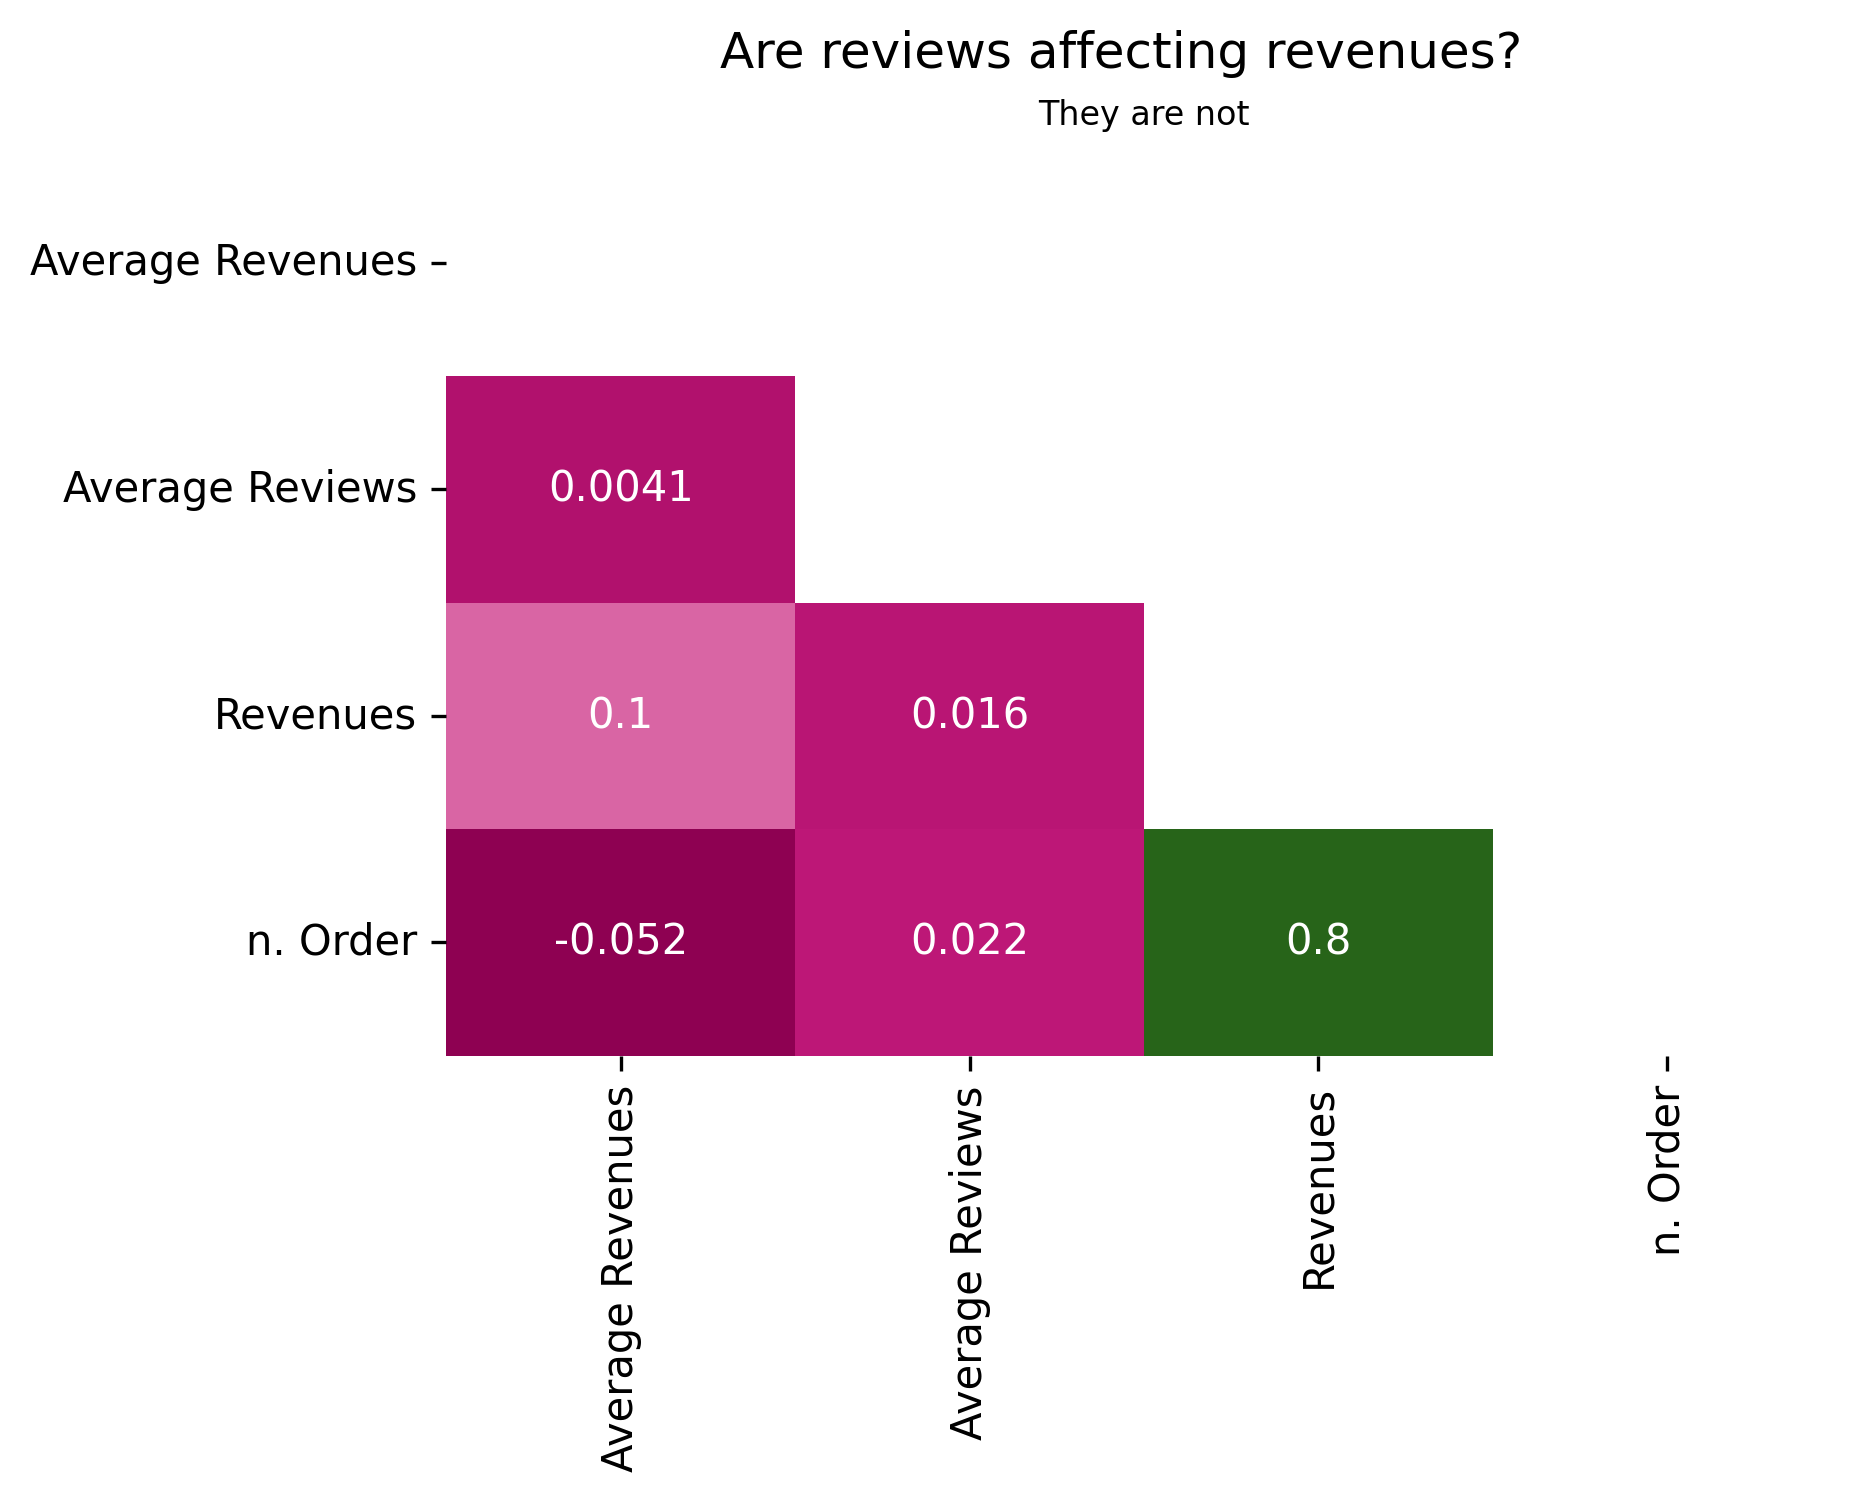

In [6]:
# ARE REVIEWS AFFECTING REVENUES?

df = sellers.iloc[:,[-1,-2,-3,-4]]

corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

heatmaplabels = ['Average Revenues','Average Reviews','Revenues','n. Order']

plt.figure(dpi = 300)
sns.heatmap(corr,
            xticklabels = heatmaplabels,
            yticklabels = heatmaplabels,
            cmap = 'PiYG',
            cbar = False,
            annot = True,
            mask = mask)

plt.suptitle('Are reviews affecting revenues?')
plt.title('They are not', fontsize = 8)

In [7]:
sellers1 = pd.read_csv('sellers+review+revenues.csv')

fig4 = px.scatter(sellers1, x='seller_id',
                  y='review_avg',
                  hover_name ='seller_id',
                  size = 'revenues',
                  marginal_y = 'box',
                  color_discrete_sequence=['green'])

fig4.update_layout(xaxis={'categoryorder':'total descending'},
                   title_text = 'Reviews per seller, size are Revenues'
                                '<br><sup>As expected, even with low reviews, the revenues can be high</sup>',
                   title_x = 0.5,
                   plot_bgcolor='white')

fig4.update_yaxes(title_text='Average Review')

fig4.update_xaxes(title_text='Seller ID',
                  showticklabels = False)

fig4.update(layout_coloraxis_showscale=False)

fig4.show(renderer='browser')

In [8]:
# WHAT'RE THE SHIPMENT SCORE AND AVERAGE SHIPPING DAYS PER SELLERS?

sellers2 = pd.read_csv('seller_review_deltatime.csv', sep = ';').iloc[:,[0,6,7,8,9]]

sellers2['Shipments Score'] = sellers2['delta_eff'] + sellers2['delta_est']
sellers2['Shipments Score'] = 1/sellers2['Shipments Score']
sellers2['Shipments Score'] = (sellers2['Shipments Score'] - sellers2['Shipments Score'].min())/\
                        (sellers2['Shipments Score'].max() - sellers2['Shipments Score'].min())

cols_to_norm = ['delta_eff','Shipments Score']
sellers2[cols_to_norm] = sellers2[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

sellers2.rename(columns={'delta_eff': 'deltaDays'}, inplace = True)

Text(0.5, 1.0, 'No correlation shown')

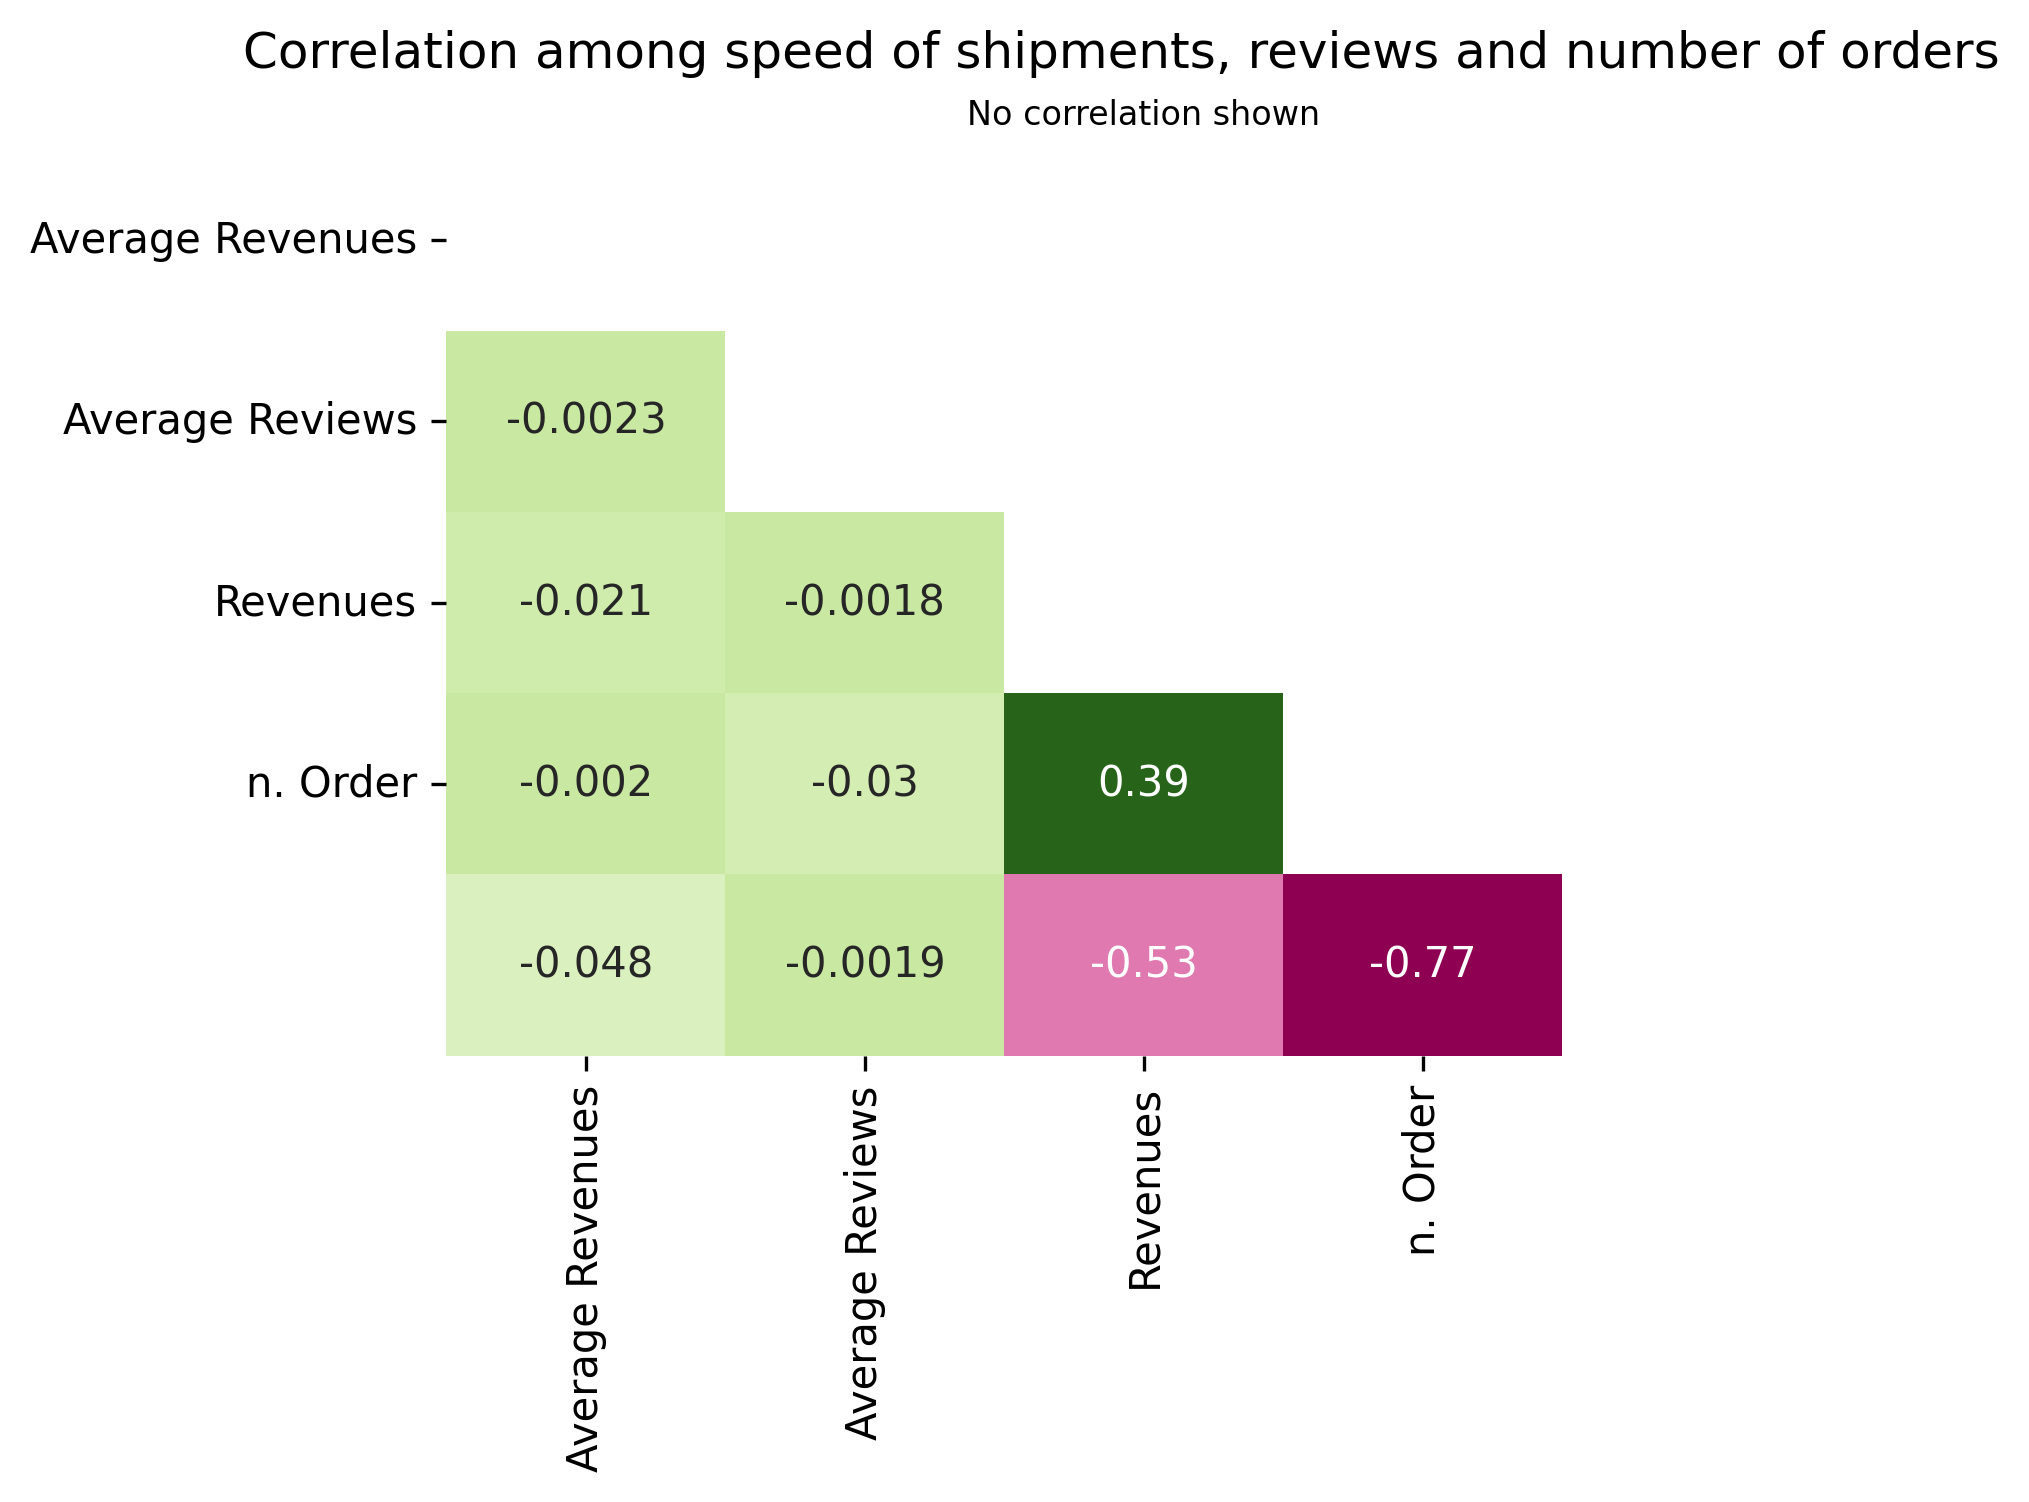

In [11]:
# DOES BEING LATE AFFECT REVIEWS OR REVENUES?

corr2 = sellers2.corr()
mask2 = np.zeros_like(corr2)
mask2[np.triu_indices_from(mask2)] = True

heatmaplabels2 = ['Order Count','Reviews Average','deltaDaysEff', 'deltaDaysEst', 'Shipment Score']

plt.figure(dpi = 300)
sns.heatmap(corr2,
            xticklabels = heatmaplabels,
            yticklabels = heatmaplabels,
            cmap = 'PiYG',
            cbar = False,
            annot = True,
            mask = mask2)

plt.suptitle('Correlation among speed of shipments, reviews and number of orders')
plt.title('No correlation shown', fontsize = 8)

In [ ]:
fig5 = px.scatter(sellers2, x='seller_id',
                  y=['Shipments Score', 'deltaDays'],
                  color_discrete_sequence=['red', 'blue'],
                  marginal_y = 'box',
                  labels=dict(variable="Variables"))

fig5.update_layout(xaxis={'categoryorder':'category descending'},
                   title_text = 'Shipments Score and Days per Seller',
                   title_x = 0.5,
                   plot_bgcolor='white')

fig5.update_yaxes(title_text='Shipments Score and Days')

fig5.update_xaxes(title_text='Seller ID',
                  showticklabels = False)

fig5.show(renderer='browser')